## **Importation des packages**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **Importation des données**

In [52]:
# Connexion a google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Importation des données
df_train = pd.read_csv('/content/drive/MyDrive/Data/Credit-Card-Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Data/Credit-Card-Test.csv')

In [54]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


*Tailles des données*

In [55]:
print(df_train.shape)
print(df_test.shape)

(614, 13)
(367, 12)


*Type de données*

In [56]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #

 *Description des données*

In [57]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
df_train.describe(include = 'O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


## **Prétraitement des données**

### Vérification et Traitement des valeurs manquantes

*Vérification*

In [59]:
# Calculer la proportion de valeurs manquantes par colonne pour les données d'entrainement
missing_proportions_train = df_train.isnull().mean()
print("\nLa proportion de données manquantes dans les données d'entrainement sont :\n",missing_proportions_train)

# Calculer la proportion de valeurs manquantes par colonne pour les données de test
missing_proportions_test = df_test.isnull().mean()
print("\nLa proportion de données manquantes dans les données d'entrainement sont :\n",missing_proportions_test)


La proportion de données manquantes dans les données d'entrainement sont :
 Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

La proportion de données manquantes dans les données d'entrainement sont :
 Loan_ID              0.000000
Gender               0.029973
Married              0.000000
Dependents           0.027248
Education            0.000000
Self_Employed        0.062670
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.013624
Loan_Amount_Term     0.016349
Credit_History       0.079019
Property_Area        0.000000
dtype: float64


*Traitement*

In [60]:
#Sépare les jeu de données d'entrainement en deux, un contenant les variables catégorielles et l'autre les variables numériques
cat_train=[]
num_train=[]
for i, c in enumerate(df_train.dtypes):
  if c==object:
    cat_train.append(df_train.iloc[:,i])
  else:
    num_train.append(df_train.iloc[:,i])
cat_train=pd.DataFrame(cat_train).transpose()
num_train=pd.DataFrame(num_train).transpose()

#Sépare les jeu de données de test en deux, un contenant les variables catégorielles et l'autre les variables numériques
cat_test=[]
num_test=[]
for i, c in enumerate(df_test.dtypes):
  if c==object:
    cat_test.append(df_test.iloc[:,i])
  else:
    num_test.append(df_test.iloc[:,i])
cat_test=pd.DataFrame(cat_test).transpose()
num_test=pd.DataFrame(num_test).transpose()

In [61]:
# Données d'entrainement : Pour les variables catégorielles, remplacer les valeurs manquantes par la valeurs avec le plus grand nombre d'occurences
cat_train=cat_train.apply(lambda x:x.fillna(x.value_counts().index[0]))
print(cat_train.isnull().sum().any())

# Données de test : Pour les variables catégorielles, remplacer les valeurs manquantes par la valeurs avec le plus grand nombre d'occurences
cat_test=cat_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
print(cat_test.isnull().sum().any())

False
False


In [62]:
# Données d'entrainement : Pour les variables numériques, remplacer les valeurs manquantes par la valeurs précédentes
num_train.apply(lambda x:x.fillna(method='bfill', inplace = True))
print(num_train.isnull().sum().any())

# Données de test : Pour les variables numériques, remplacer les valeurs manquantes par la valeurs précédentes
num_test.apply(lambda x:x.fillna(method='bfill', inplace = True))
print(num_test.isnull().sum().any())

False
False


<ipython-input-62-4c7d050d71ad>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_train.apply(lambda x:x.fillna(method='bfill', inplace = True))
<ipython-input-62-4c7d050d71ad>:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_test.apply(lambda x:x.fillna(method='bfill', inplace = True))


*Doublons*

In [63]:
print("Le nombre de doublons dans les données d'entrainement est", df_train.duplicated().sum())
print("Le nombre de doublons dans les données de test est", df_test.duplicated().sum())

Le nombre de doublons dans les données d'entrainement est 0
Le nombre de doublons dans les données de test est 0


### Vérification et Traitement des valeurs aberrantes

*Vérification*

Visualisation de boxplot des données d'entrainement


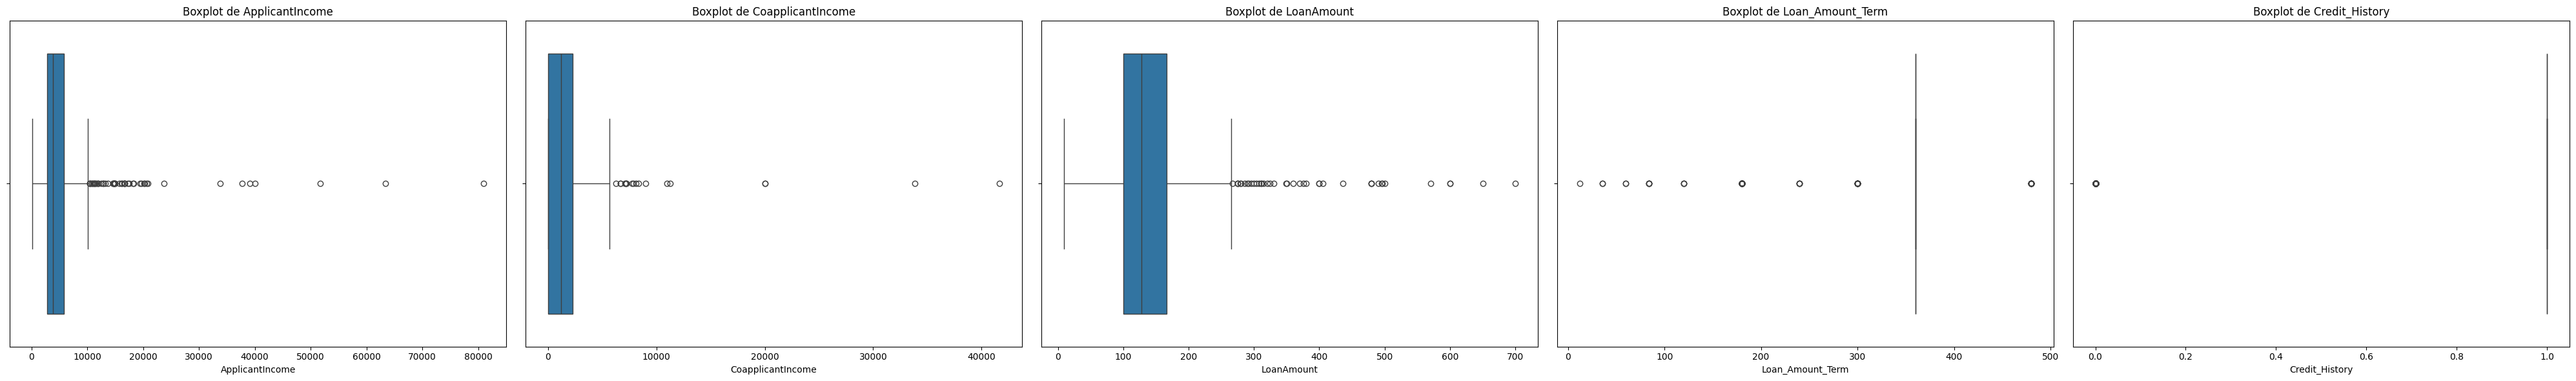

Visualisation de boxplot des données de test


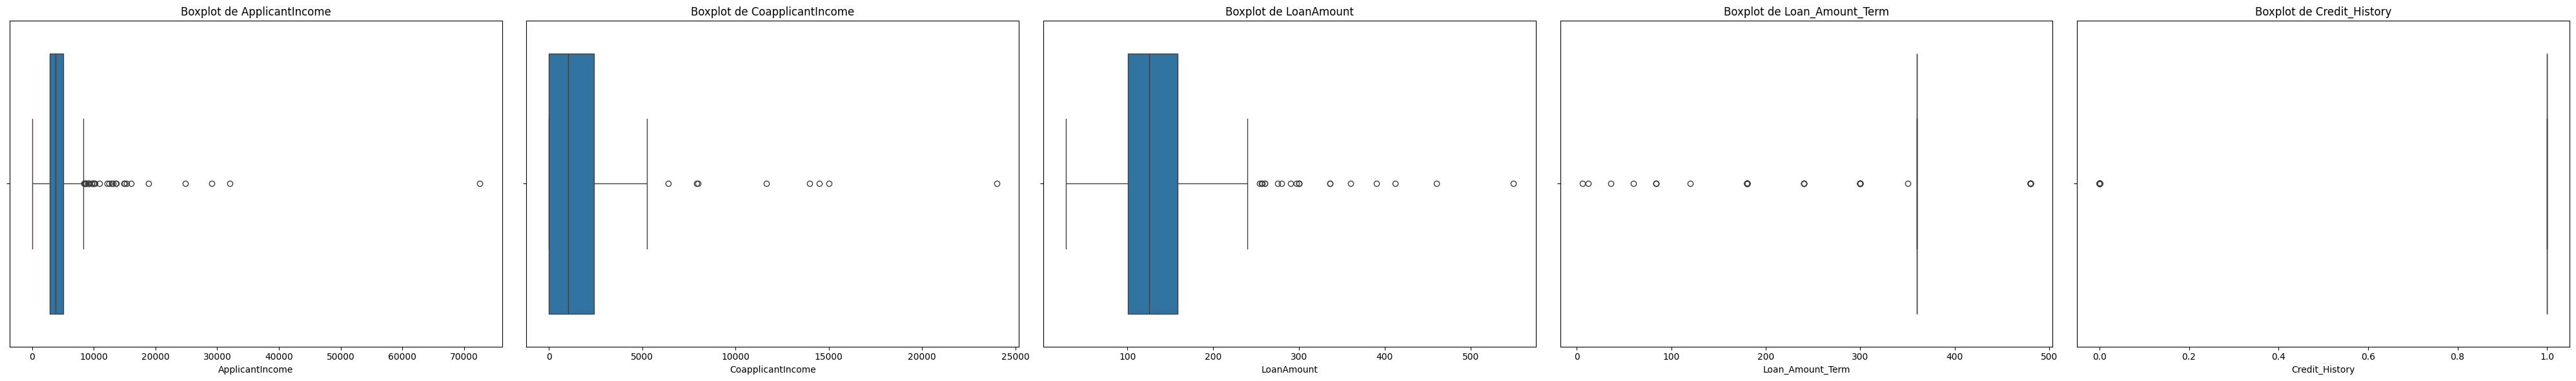

In [64]:
#Pour les données d'entrainement
# Définir le nombre de colonnes pour la grille de sous-graphiques
n_cols = len(num_train.columns)
n_rows = 1  # Affichage sur une seule ligne

# Créer la figure et les axes pour les sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, 6))

# Si le DataFrame n'a qu'une seule colonne, axes sera un tableau de taille (1,)
if n_cols == 1:
    axes = [axes]

# Générer un boxplot pour chaque colonne et l'ajouter aux axes
for i, column in enumerate(num_train.columns):
    sns.boxplot(x=num_train[column], ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}")

# Afficher la figure
print("Visualisation de boxplot des données d'entrainement")
plt.tight_layout()  # Pour ajuster les espacements entre les subplots
plt.show()


######################################################################################################


#Pour les données de test
# Définir le nombre de colonnes pour la grille de sous-graphiques
n_cols = len(num_test.columns)
n_rows = 1  # Affichage sur une seule ligne

# Créer la figure et les axes pour les sous-graphiques
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 8, 6))

# Si le DataFrame n'a qu'une seule colonne, axes sera un tableau de taille (1,)
if n_cols == 1:
    axes = [axes]

# Générer un boxplot pour chaque colonne et l'ajouter aux axes
for i, column in enumerate(num_test.columns):
    sns.boxplot(x=num_test[column], ax=axes[i])
    axes[i].set_title(f"Boxplot de {column}")

# Afficher la figure
print("Visualisation de boxplot des données de test")
plt.tight_layout()  # Pour ajuster les espacements entre les subplots
plt.show()


*Traitement*

Malgré le fait que nos jeux de données contiennent des valeurs aberrantes, nous prenons la décision de les conserver, car elles peuvent être pertinentes pour l'analyse de ces variables , et pourraient refléter des comportements extrêmes ou des événements rares qui sont importants pour la modélisation.

## **Encodage**

In [65]:
#Remplacer les valeurs catégorielles par des valeurs numériques (0,1,2 ...) du jeu de données d'entrainement
le=LabelEncoder()
for i in cat_train:
  cat_train[i]=le.fit_transform(cat_train[i])


#Remplacer les valeurs catégorielles par des valeurs numériques (0,1,2 ...) du jeu de données de test
le=LabelEncoder()
for i in cat_test:
  cat_test[i]=le.fit_transform(cat_test[i])

In [66]:
#Supprimer Loan_ID
cat_test.drop('Loan_ID', axis=1, inplace=True)
cat_train.drop('Loan_ID', axis=1, inplace=True)

In [67]:
#Concatener cat_train et num_train
df_train=pd.concat([cat_train, num_train], axis=1)

#Concatener cat_test et num_test
df_test=pd.concat([cat_test, num_test], axis=1)

In [69]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,1,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,1,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,1,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,1,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,1,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,1,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,1,7583.0,0.0,187.0,360.0,1.0


In [ ]:
#Sauvegarder les données nettoyées
df_train.to_csv('/content/drive/MyDrive/Data/Credit-Card-Train-Clean.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/Data/Credit-Card-Test-Clean.csv', index=False)